# CLUSTERING ANALYSIS 

### Data Preprocessing:
#### 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
#### 2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
#### 3.	Use multiple visualizations to understand the hidden patterns in the dataset

### 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

### Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

### Load the Dataset

In [52]:
data = pd.read_csv("EastWestAirlines_15.csv")
print("Initial Data Shape:", data.shape)
print("\nFirst 5 Rows of Data:")
print(data.head())

Initial Data Shape: (3999, 12)

First 5 Rows of Data:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


##### Drop unnecessary ID columns if present

In [53]:
if 'ID#' in data.columns:
    data.drop(columns=['ID#'], inplace=True)

##### HANDLE MISSING VALUES

In [54]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


##### OUTLIER DETECTION & REMOVAL
##### Using Z-score method to remove outliers

In [55]:
z_scores = np.abs(stats.zscore(data))
filtered_entries = (z_scores < 3).all(axis=1)
data_clean = data[filtered_entries]

In [56]:
data_clean.shape

(3630, 11)

##### FEATURE SCALING

In [57]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

###### Convert back to DataFrame for easier handling

In [58]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_clean.columns)

In [59]:
print("\nScaled Data (first 5 rows):")
print(data_scaled_df.head())


Scaled Data (first 5 rows):
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.523260   -0.158869  -0.755664        0.0        0.0    -0.779029   
1 -0.667084   -0.158869  -0.755664        0.0        0.0    -0.776768   
2 -0.309747   -0.158869  -0.755664        0.0        0.0    -0.561235   
3 -0.739295   -0.158869  -0.755664        0.0        0.0    -0.761050   
4  0.601746   -0.158869   1.517591        0.0        0.0     1.599448   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.147142          -0.401822        -0.431775           1.431438   
1    -1.025933          -0.401822        -0.431775           1.415848   
2    -0.783516          -0.401822        -0.431775           1.448002   
3    -1.147142          -0.401822        -0.431775           1.408053   
4     1.883076           2.859455         1.768005           1.399771   

     Award?  
0 -0.718093  
1 -0.718093  
2 -0.718093  
3 -0.718093  
4  1.392577  


##### 2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
##### Statistical summary

In [60]:
print("\nStatistical Summary:")
print(data_clean.describe())


Statistical Summary:
             Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000         

##### 3.	Use multiple visualizations to understand the hidden patterns in the dataset
##### Distribution of each numerical feature

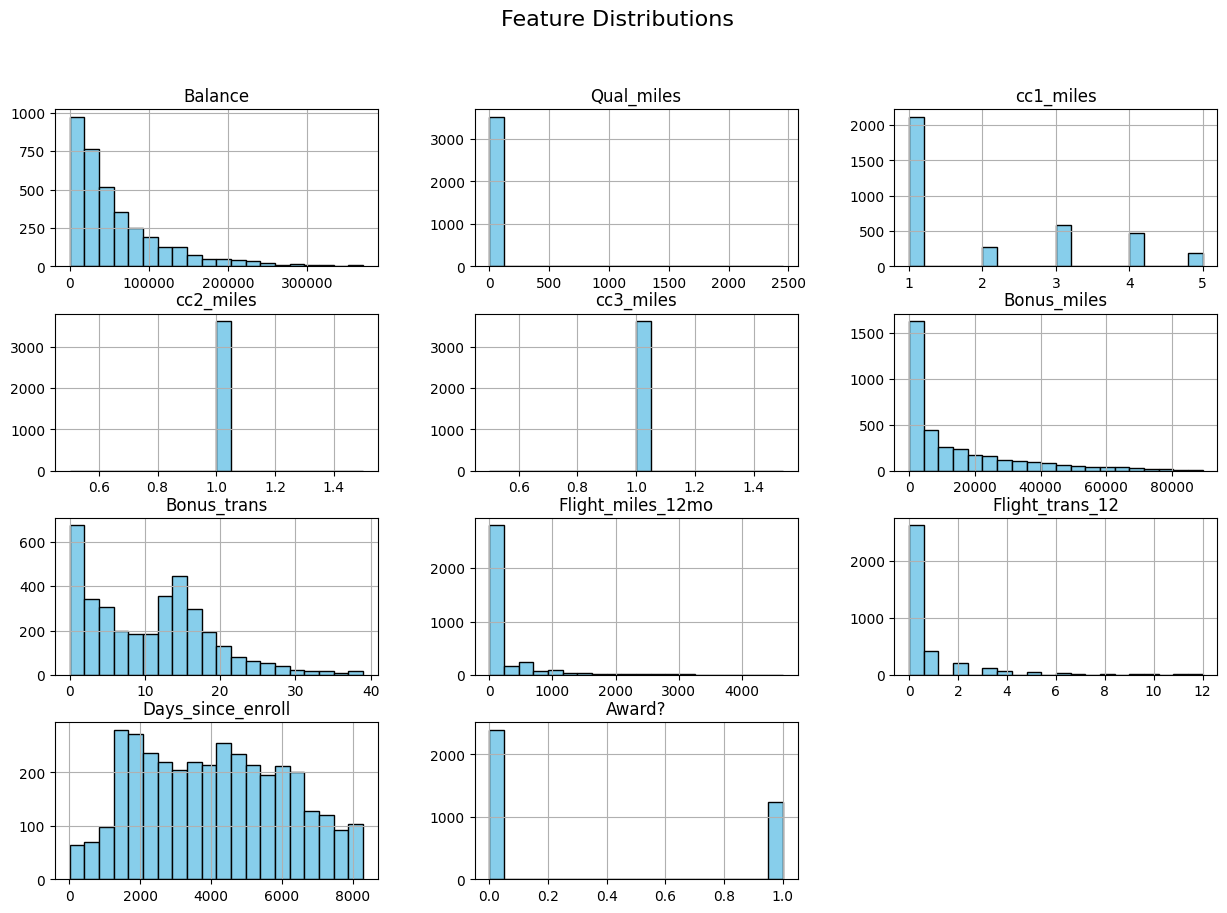

In [61]:
data_clean.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

##### CORRELATION HEATMAP

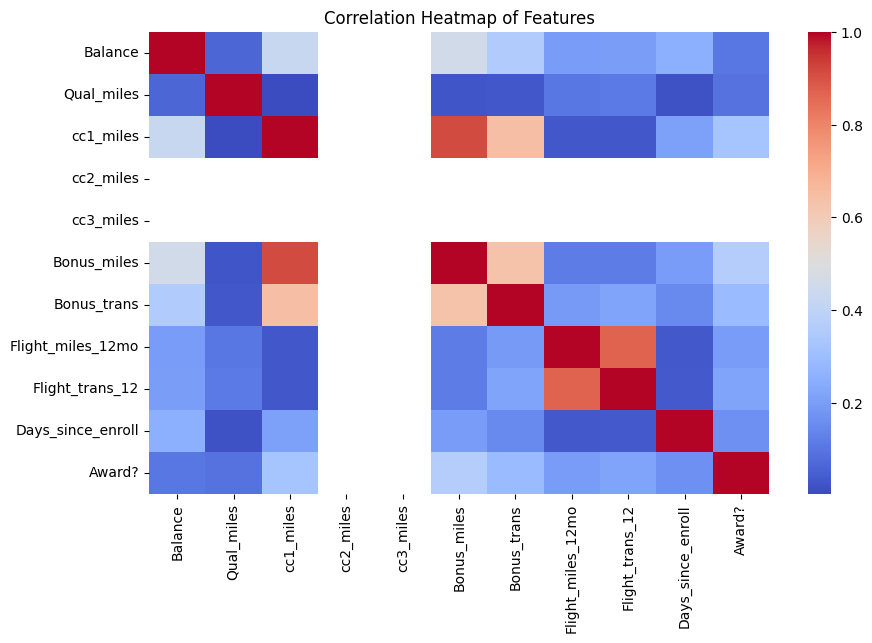

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_clean.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

##### BOX PLOTS TO VISUALIZE OUTLIERS

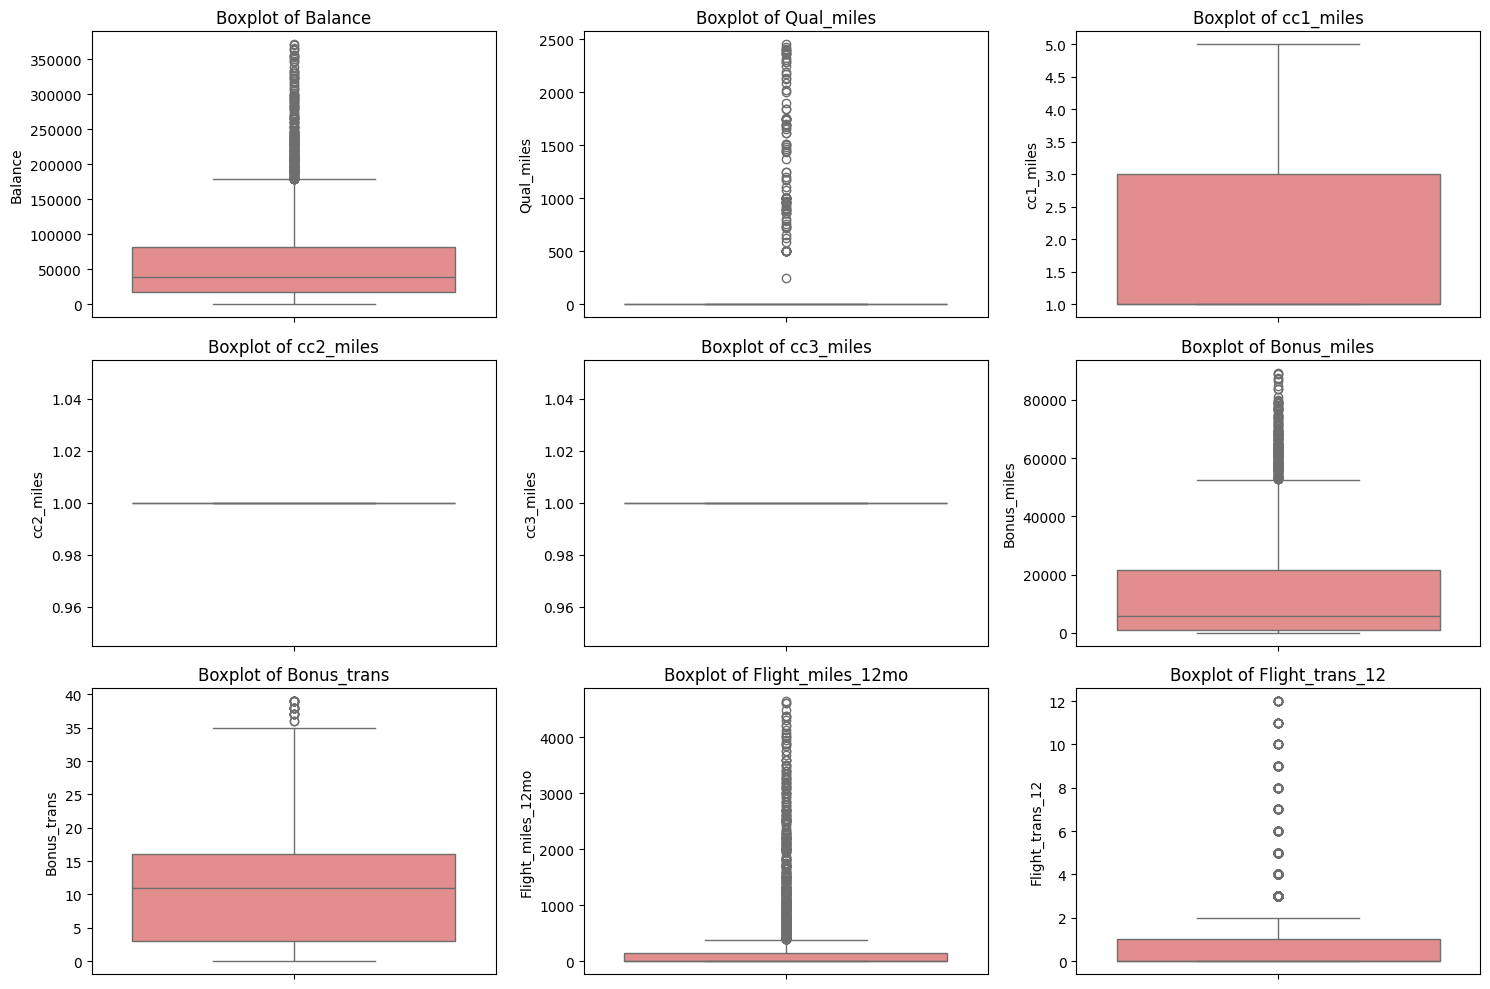

In [63]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_clean.columns[:9]):  # limit to first few for readability
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data_clean[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#### PAIRPLOT FOR CLUSTER TENDENCIES

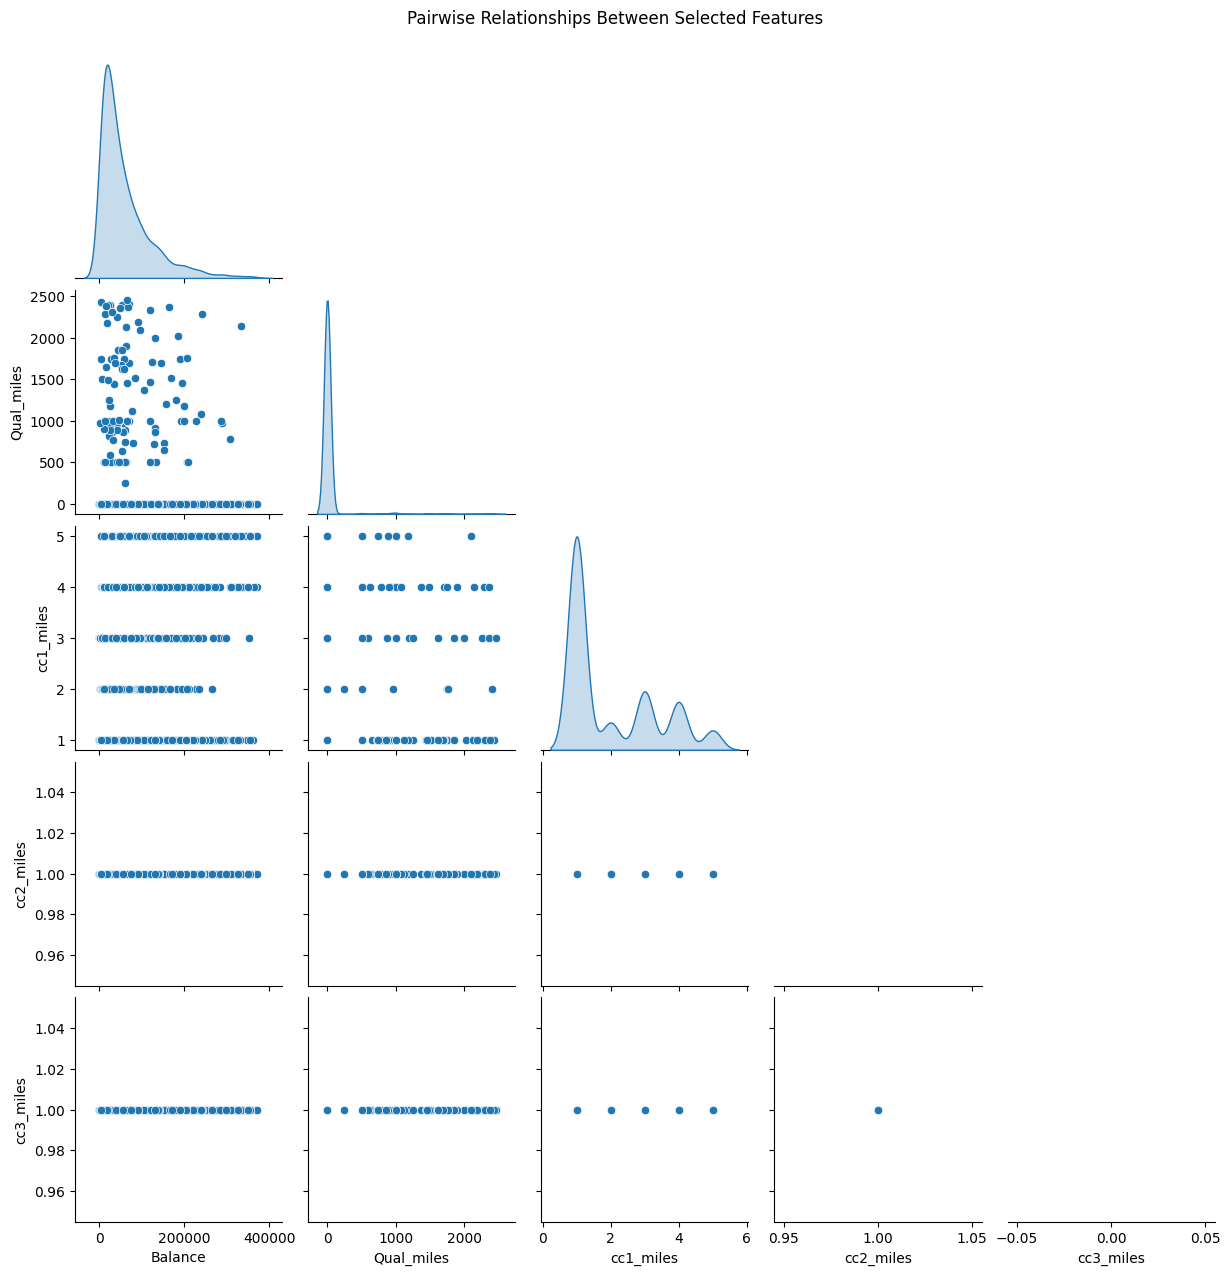

In [64]:
sns.pairplot(data_clean.iloc[:, :5], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Selected Features", y=1.02)
plt.show()

#### INSIGHTS

In [65]:
print("""
Key EDA Insights:
1. The dataset appears well-structured with no categorical columns.
2. After removing outliers (z < 3), the data became more stable for clustering.
3. The correlation heatmap shows certain features are strongly related (e.g., Balance, BonusMiles, BonusTrans).
4. Distribution plots reveal skewness in several features — scaling was necessary.
5. The pairplot suggests possible cluster separations based on flight usage and balance variables.
""")


Key EDA Insights:
1. The dataset appears well-structured with no categorical columns.
2. After removing outliers (z < 3), the data became more stable for clustering.
3. The correlation heatmap shows certain features are strongly related (e.g., Balance, BonusMiles, BonusTrans).
4. Distribution plots reveal skewness in several features — scaling was necessary.
5. The pairplot suggests possible cluster separations based on flight usage and balance variables.



#### Implementing Clustering Algorithms:
###### •	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
###### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
###### •	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

## •	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### K-MEANS CLUSTERING
### Find the optimal number of clusters using the Elbow Method

In [67]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

#### Plot the Elbow Curve

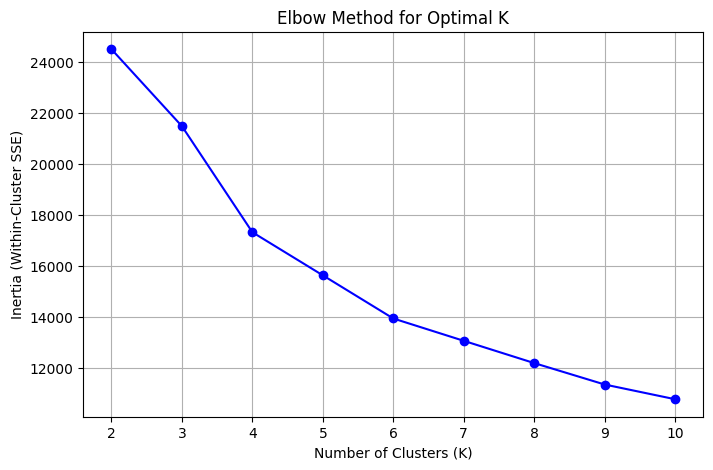

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.grid(True)
plt.show()

### Choose the optimal K (based on the Elbow curve; adjust manually as needed)


In [69]:
optimal_k = 4  # You can change this after observing the plot

#### Apply K-Means with the chosen number of clusters

In [70]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(data_scaled_df)

#### Evaluate using Silhouette Score

In [71]:
silhouette_kmeans = silhouette_score(data_scaled_df, kmeans_labels)
print(f"Silhouette Score for K-Means (k={optimal_k}): {silhouette_kmeans:.3f}")

Silhouette Score for K-Means (k=4): 0.332


#### Visualize the clusters using PCA (for 2D projection)

In [72]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled_df)

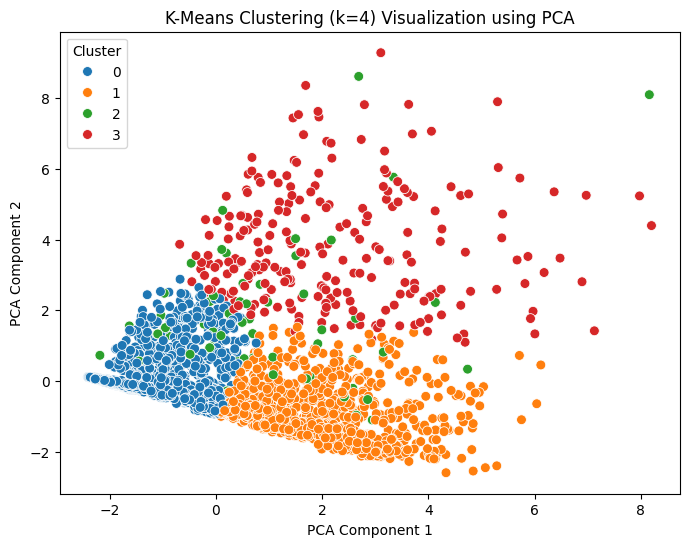

In [73]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='tab10', s=50)
plt.title(f"K-Means Clustering (k={optimal_k}) Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

#### • Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
#### Experiment with different epsilon (eps) and min_samples values

In [74]:
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 8]

best_score = -1
best_params = {}

In [75]:
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(data_scaled_df)

        # Skip invalid results (all points in one cluster or all as noise)
        if len(set(labels)) <= 1 or len(set(labels)) == len(data_scaled_df):
            continue

#### Exclude noise points (-1) for silhouette score

In [76]:
mask = labels != -1
if len(np.unique(labels[mask])) > 1:  # ensure at least 2 clusters remain
            sil = silhouette_score(data_scaled_df[mask], labels[mask])
            print(f"DBSCAN -> eps={eps}, min_samples={min_samples}, Silhouette={sil:.3f}")

DBSCAN -> eps=2.0, min_samples=8, Silhouette=0.262


In [77]:
if sil > best_score:
    best_score = sil
    best_params = {'eps': eps, 'min_samples': min_samples, 'silhouette': sil}

##### Print the best DBSCAN parameters

In [78]:
print("\nBest DBSCAN Parameters:")
print(best_params)


Best DBSCAN Parameters:
{'eps': 2.0, 'min_samples': 8, 'silhouette': 0.26202281248772824}


#### Apply DBSCAN with the best parameters

In [79]:
dbscan_final = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan_final.fit_predict(data_scaled_df)

##### Add DBSCAN cluster labels to dataset

In [80]:
data_clean['DBSCAN_Cluster'] = dbscan_labels

C:\Users\adminindia\AppData\Local\Temp\ipykernel_15212\904431929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['DBSCAN_Cluster'] = dbscan_labels


#### Count the number of clusters (excluding noise)

In [81]:
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN formed {unique_clusters} clusters (excluding noise).")

DBSCAN formed 2 clusters (excluding noise).


#### Visualize DBSCAN clusters using PCA

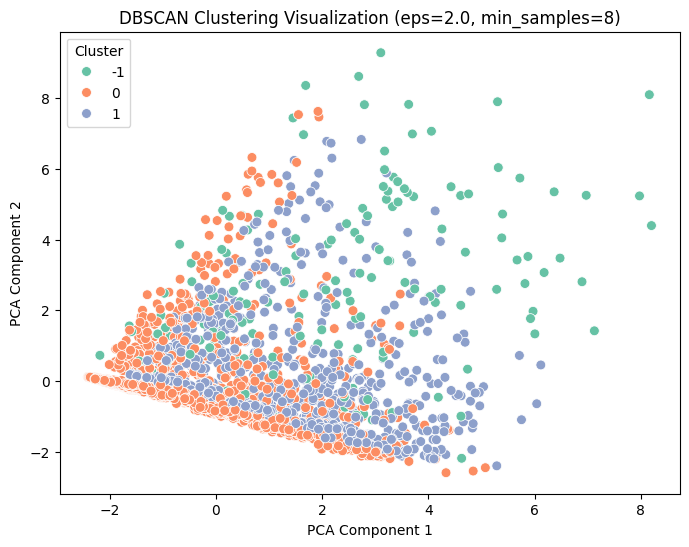

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dbscan_labels, palette='Set2', s=50)
plt.title(f"DBSCAN Clustering Visualization (eps={best_params['eps']}, min_samples={best_params['min_samples']})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

#### •	Experiment with different parameter settings for K-means (Elbow curve for different K values) and 
####  DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [83]:
print(f"K-Means: {optimal_k} clusters, Silhouette Score = {silhouette_kmeans:.3f}")
print(f"DBSCAN: {unique_clusters} clusters, Silhouette Score = {best_params['silhouette']:.3f}")

K-Means: 4 clusters, Silhouette Score = 0.332
DBSCAN: 2 clusters, Silhouette Score = 0.262


#### Save the clustered dataset

In [84]:
data_clean.to_csv("Clustered_EastWestAirlines.csv", index=False)
print("\nClustered dataset saved as 'Clustered_EastWestAirlines.csv'")


Clustered dataset saved as 'Clustered_EastWestAirlines.csv'


#### Cluster Analysis and Interpretation:
###### Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Ensure you already have cluster labels in the dataset:
#### data_clean['KMeans_Cluster']
#### data_clean['DBSCAN_Cluster']

# K-MEANS CLUSTER ANALYSIS

In [86]:
from sklearn.cluster import KMeans

In [90]:
print("\nK-Means Cluster Summary:")


K-Means Cluster Summary:


In [92]:
kmeans_summary = data_clean.groupby("KMeans_Cluster").mean().round(2)
print(kmeans_summary)

KeyError: 'KMeans_Cluster'


K-Means Cluster Summary:


In [87]:
print("\nK-Means Cluster Summary:")
kmeans_summary = data_clean.groupby('KMeans_Cluster').mean().round(2)
print(kmeans_summary)


K-Means Cluster Summary:


KeyError: 'KMeans_Cluster'

#### Visualize key features by cluster

In [88]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='KMeans_Cluster', y='Balance', data=data_clean, palette='tab10')
plt.title("K-Means Clusters vs Balance")
plt.show()

ValueError: Could not interpret value `KMeans_Cluster` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>